<a href="https://colab.research.google.com/github/jacksonsin/machine_learning/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference:**

https://towardsdatascience.com/a-python-tool-for-data-processing-analysis-and-ml-automation-in-a-few-lines-of-code-da04b3ba904f

In [1]:
!pip install dabl

**Titanic Dataset**

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Pre-processing**

In [3]:
import dabl

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
df_clean = dabl.clean(df, verbose=1)

Detected feature types:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


In [5]:
db_types = dabl.detect_types(df_clean)
db_types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Survived,False,False,False,True,False,False,False
Pclass,False,False,False,True,False,False,False
Name,False,False,False,False,False,True,False
Sex,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False
SibSp,False,False,True,False,False,False,False
Parch,False,False,True,False,False,False,False
Ticket,False,False,False,False,False,True,False
Fare,True,False,False,False,False,False,False
Cabin,False,False,False,False,False,True,False


**Exploratory Data Analysis**

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


[[<Figure size 864x864 with 20 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

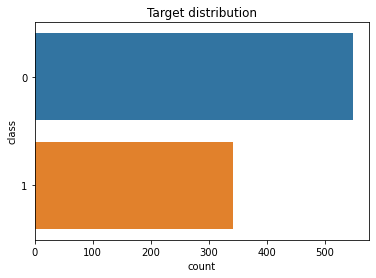

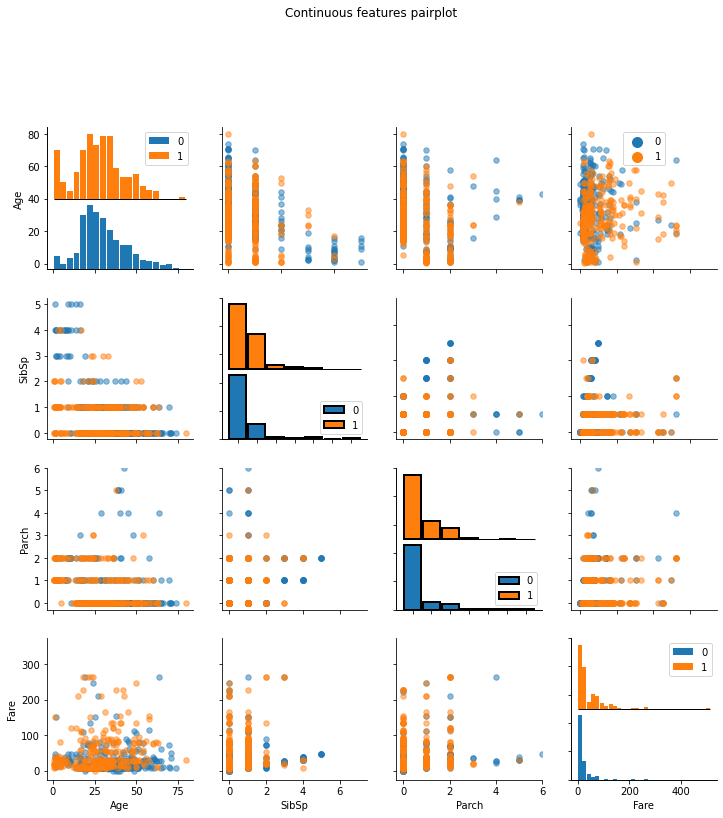

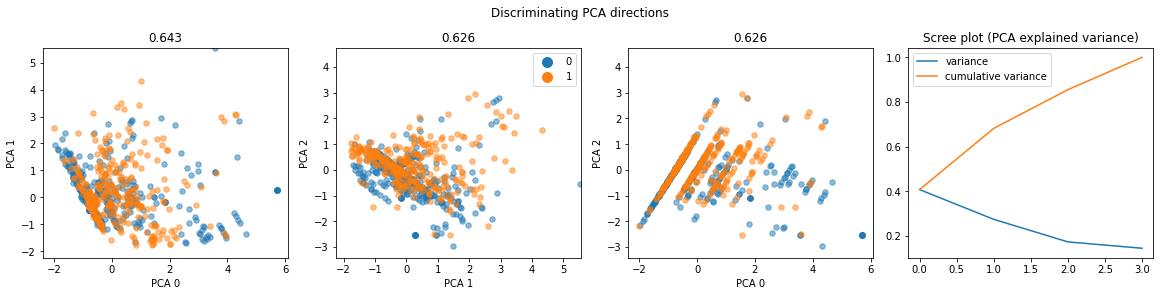

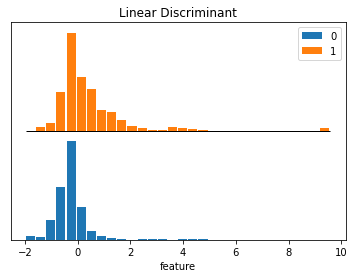

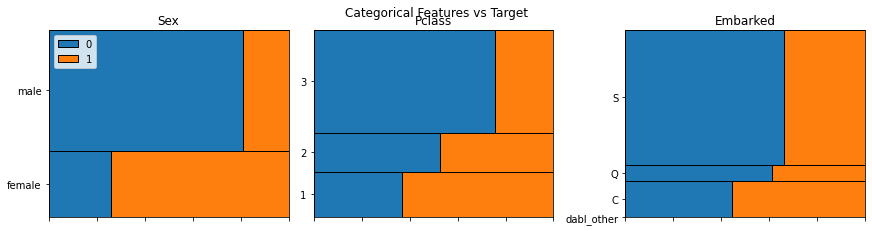

In [6]:
dabl.plot(df_clean, target_col="Survived")

plot() function in dabl can feature visualization by plotting various plots including:

Bar plot for target distribution

Scatter Pair plots

Linear Discriminant Analysis

**Initial Model Building**

In [7]:
from sklearn.model_selection import train_test_split
# Assign to Predictors
X = df_clean.iloc[:,1:]
# Assign to Target
y = df_clean.iloc[:,0]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((712, 10), (179, 10))

In [9]:
y_train.shape, y_test.shape

((712,), (179,))

In [10]:
# Model Building
survivor_classifier = dabl.SimpleClassifier(random_state=42).fit(X_train, y_train)

Running DummyClassifier()
accuracy: 0.624 average_precision: 0.376 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.384
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.624 average_precision: 0.376 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.384

Running GaussianNB()
accuracy: 0.417 average_precision: 0.751 roc_auc: 0.829 recall_macro: 0.530 f1_macro: 0.348
=== new best GaussianNB() (using recall_macro):
accuracy: 0.417 average_precision: 0.751 roc_auc: 0.829 recall_macro: 0.530 f1_macro: 0.348

Running MultinomialNB()
accuracy: 0.788 average_precision: 0.796 roc_auc: 0.833 recall_macro: 0.760 f1_macro: 0.767
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.788 average_precision: 0.796 roc_auc: 0.833 recall_macro: 0.760 f1_macro: 0.767

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.788 average_precision: 0.622 roc_auc: 0.766 recall_macro: 0.766 f1_macro: 0.770
=== new best DecisionTreeClassifier(class_weight='balanced', 

In [11]:
# Construct DataFrame for Test dataset
df2 = X_test # Test dataset
df2['Survived'] = y_test # Actual survivors
df2['Predicted_Survived'] = survivor_classifier.predict(X_test) # AutoML classifier

In [12]:
df2['Survived'] = df2['Survived'].replace({'1': 'Yes','0': 'No'})
df2['Predicted_Survived'] = df2['Predicted_Survived'].replace({'1': 'Yes','0': 'No'})

In [13]:
df2.iloc[:,[11,10,1,2,3,4,5,6,7,8,9]].head() # Rearrange the columns

,Predicted_Survived,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,No,Yes,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,No,No,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,No,No,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,Yes,Yes,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,Yes,Yes,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [14]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(survivor_classifier, classes=['Survived','Dead'])

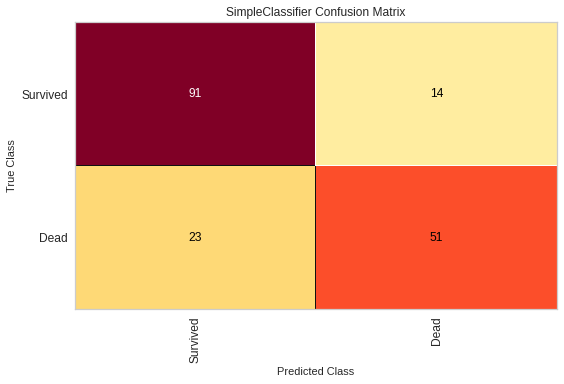

In [15]:
# Plot Confusion Matrix
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()